In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.metrics import r2_score
import numpy as np

# **1.problem statement**


   * 29531 rows and 16 columns are included in this dataset

   * AQI is the target of this dataset
   * city,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,	Benzene,Toluene,Xylene,AQI,AQI_Bucket are given
   * City: The city where the air quality data was recorded (categorical variable).
   * Date: The date of the air quality observation (not needed for modeling, can be dropped).
   * PM2.5: The concentration of fine particulate matter (particles smaller than 2.5 micrometers). High levels can affect human health.
   * PM10: The concentration of coarse particulate matter (particles smaller than 10 micrometers). These particles can cause respiratory problems.
   * NO: Nitric oxide concentration. A pollutant emitted mainly from vehicle exhaust.
   * NO2: Nitrogen dioxide concentration. It contributes to smog and can cause respiratory issues.
   * NOx: Oxides of nitrogen (combination of NO and NO2), harmful to health and the environment.
   * NH3: Ammonia concentration. It can affect air quality and is often associated with agricultural emissions.
   * CO: Carbon monoxide concentration. A toxic gas emitted from vehicles and burning fossil fuels.
   * SO2: Sulfur dioxide concentration. It contributes to acid rain and can affect respiratory health.
   * O3: Ozone concentration. High levels of ozone at ground level can cause respiratory problems.
   * Benzene: A volatile organic compound (VOC) found in air pollution, linked to serious health issues like cancer.
   * Toluene: Another VOC, commonly found in industrial emissions, can affect the nervous system.
   * Xylene: A VOC used in industrial processes, exposure can lead to health problems.
   * AQI: Air Quality Index, a numerical value that indicates the overall air quality based on pollutants (target variable for prediction).
   * AQI_Bucket: A categorical version of AQI, classifying air quality into categories like "Good," "Moderate," and "Poor."

# **2.understanding data**

In [ ]:
df=pd.read_csv('/content/city_day.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


## **discriptive statistics**

# **3.data cleaning**

In [ ]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [ ]:
# Check for missing values before filling
print("Missing values before filling:")
print(df.isnull().sum())

# Loop through each column and fill missing values based on the column type
for column in df.columns:
    if df[column].dtype == 'object':  # Categorical columns
        df[column].fillna(df[column].mode()[0], inplace=True)  # Fill with mode (most frequent value)
    else:  # Numerical columns
        df[column].fillna(df[column].mean(), inplace=True)  # Fill with mean value

# Check if all missing values are filled
print("\nMissing values after filling:")
print(df.isnull().sum())

Missing values before filling:
City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

Missing values after filling:
City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64


<ipython-input-18-d6004fe0195b>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)  # Fill with mode (most frequent value)
<ipython-input-18-d6004fe0195b>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

In [ ]:
#df.dropna(inplace=True)
#df

In [ ]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
lbl_ecdr = LabelEncoder()
df['City'] = lbl_ecdr.fit_transform(df['City'])
df['AQI_Bucket'] = lbl_ecdr.fit_transform(df["AQI_Bucket"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  int64  
 1   Date        29531 non-null  object 
 2   PM2.5       29531 non-null  float64
 3   PM10        29531 non-null  float64
 4   NO          29531 non-null  float64
 5   NO2         29531 non-null  float64
 6   NOx         29531 non-null  float64
 7   NH3         29531 non-null  float64
 8   CO          29531 non-null  float64
 9   SO2         29531 non-null  float64
 10  O3          29531 non-null  float64
 11  Benzene     29531 non-null  float64
 12  Toluene     29531 non-null  float64
 13  Xylene      29531 non-null  float64
 14  AQI         29531 non-null  float64
 15  AQI_Bucket  29531 non-null  int64  
dtypes: float64(13), int64(2), object(1)
memory usage: 3.6+ MB


## **boxplot**

<Axes: ylabel='PM2.5'>

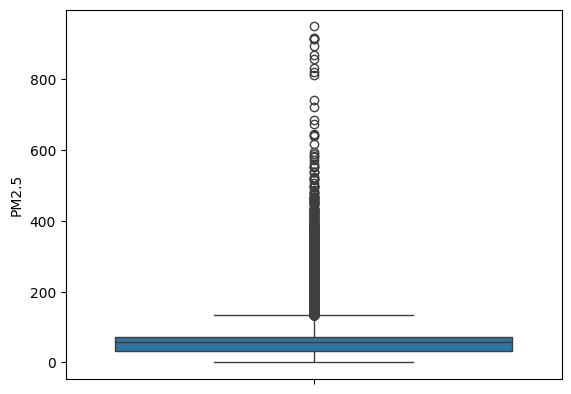

In [ ]:
sns.boxplot(df['PM2.5'])

<Axes: ylabel='PM10'>

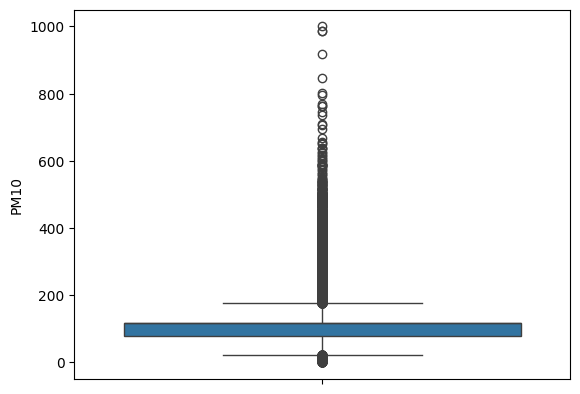

In [ ]:
sns.boxplot(df['PM10'])

<Axes: ylabel='NO'>

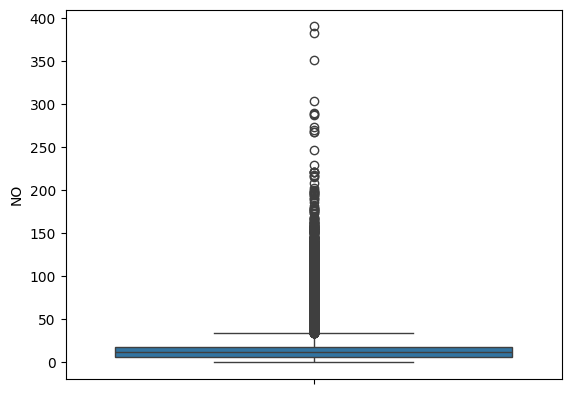

In [ ]:
sns.boxplot(df['NO'])

<Axes: ylabel='NO2'>

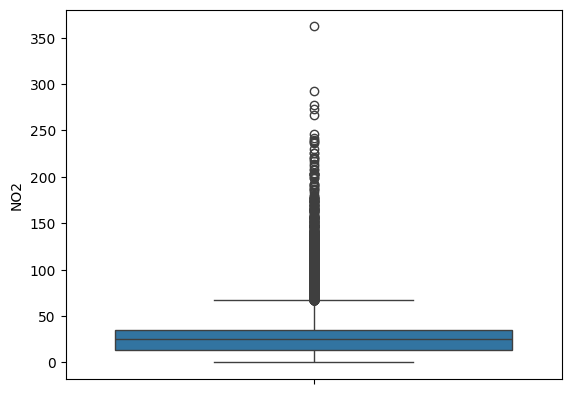

In [ ]:
sns.boxplot(df['NO2'])

<Axes: ylabel='NOx'>

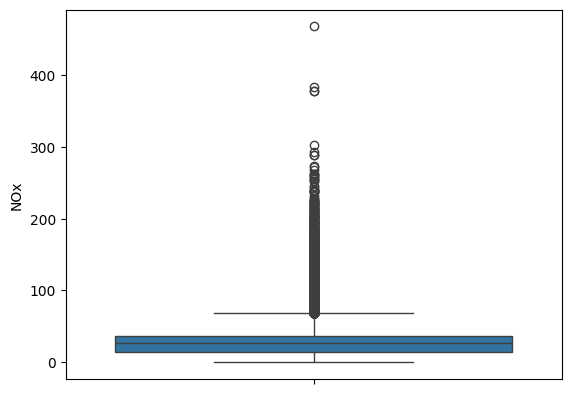

In [ ]:
sns.boxplot(df['NOx'])

<Axes: ylabel='NH3'>

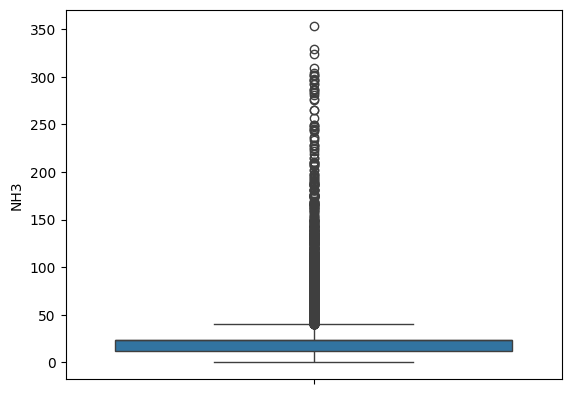

In [ ]:
sns.boxplot(df['NH3'])

<Axes: ylabel='CO'>

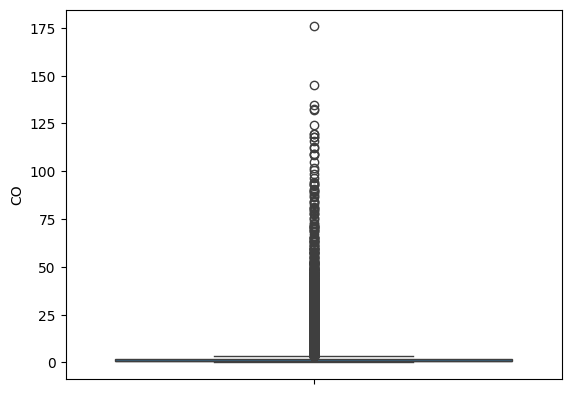

In [ ]:
sns.boxplot(df['CO'])

<Axes: ylabel='SO2'>

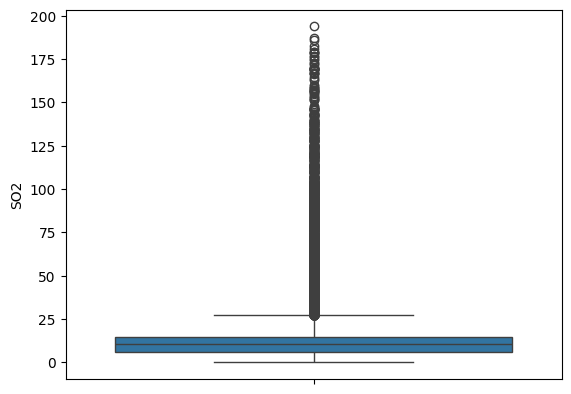

In [ ]:
sns.boxplot(df['SO2'])

<Axes: ylabel='O3'>

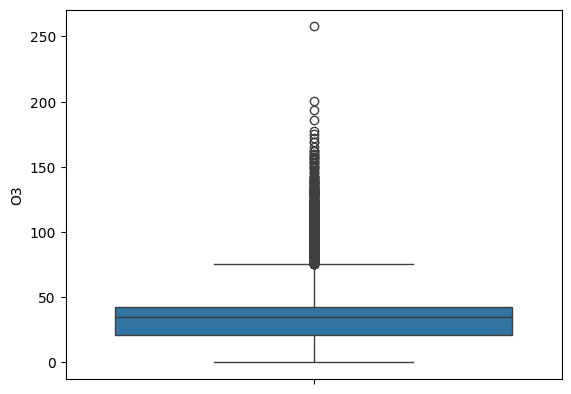

In [ ]:
sns.boxplot(df['O3'])

<Axes: ylabel='Benzene'>

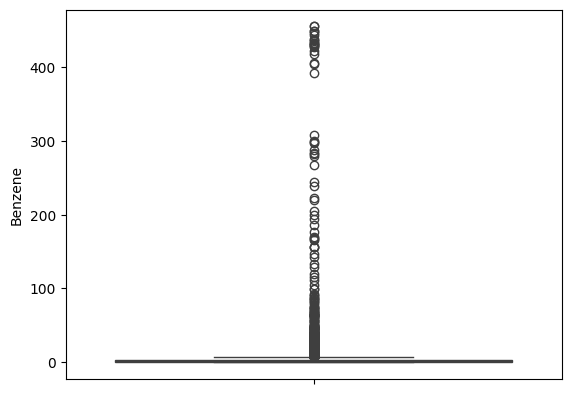

In [ ]:
sns.boxplot(df['Benzene'])

<Axes: ylabel='Toluene'>

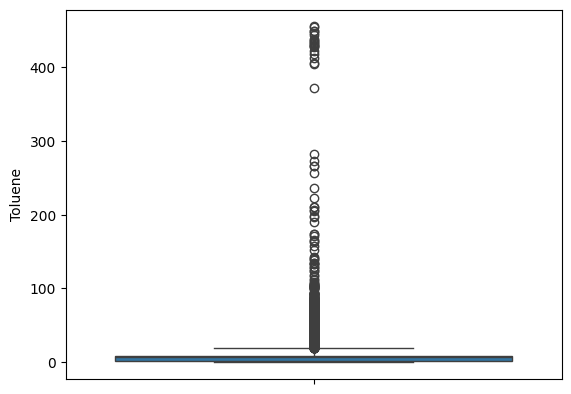

In [ ]:
sns.boxplot(df['Toluene'])

<Axes: ylabel='Xylene'>

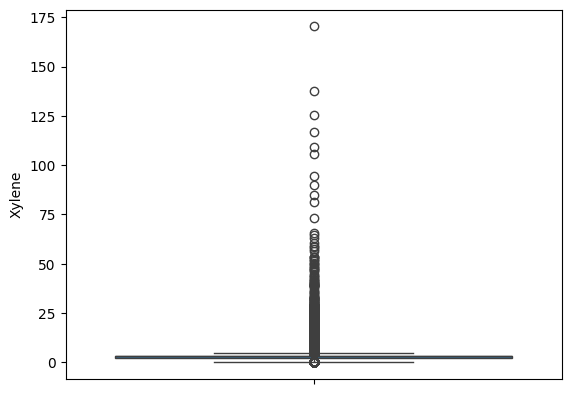

In [ ]:
sns.boxplot(df['Xylene'])

<Axes: ylabel='AQI'>

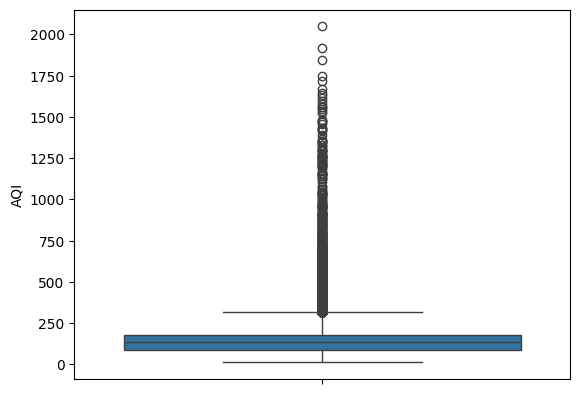

In [ ]:
sns.boxplot(df['AQI'])

# **4.data visualization**

<Axes: xlabel='PM2.5', ylabel='PM10'>

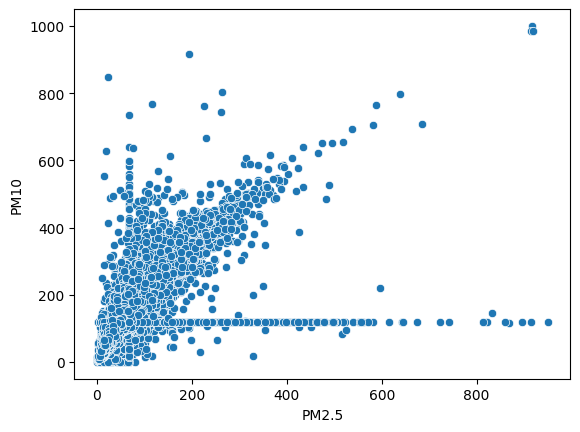

In [ ]:
sns.scatterplot(x=df['PM2.5'],y=df['PM10'])

array([[<Axes: title={'center': 'City'}>,
        <Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>, <Axes: title={'center': 'NO'}>],
       [<Axes: title={'center': 'NO2'}>, <Axes: title={'center': 'NOx'}>,
        <Axes: title={'center': 'NH3'}>, <Axes: title={'center': 'CO'}>],
       [<Axes: title={'center': 'SO2'}>, <Axes: title={'center': 'O3'}>,
        <Axes: title={'center': 'Benzene'}>,
        <Axes: title={'center': 'Toluene'}>],
       [<Axes: title={'center': 'Xylene'}>,
        <Axes: title={'center': 'AQI'}>,
        <Axes: title={'center': 'AQI_Bucket'}>, <Axes: >]], dtype=object)

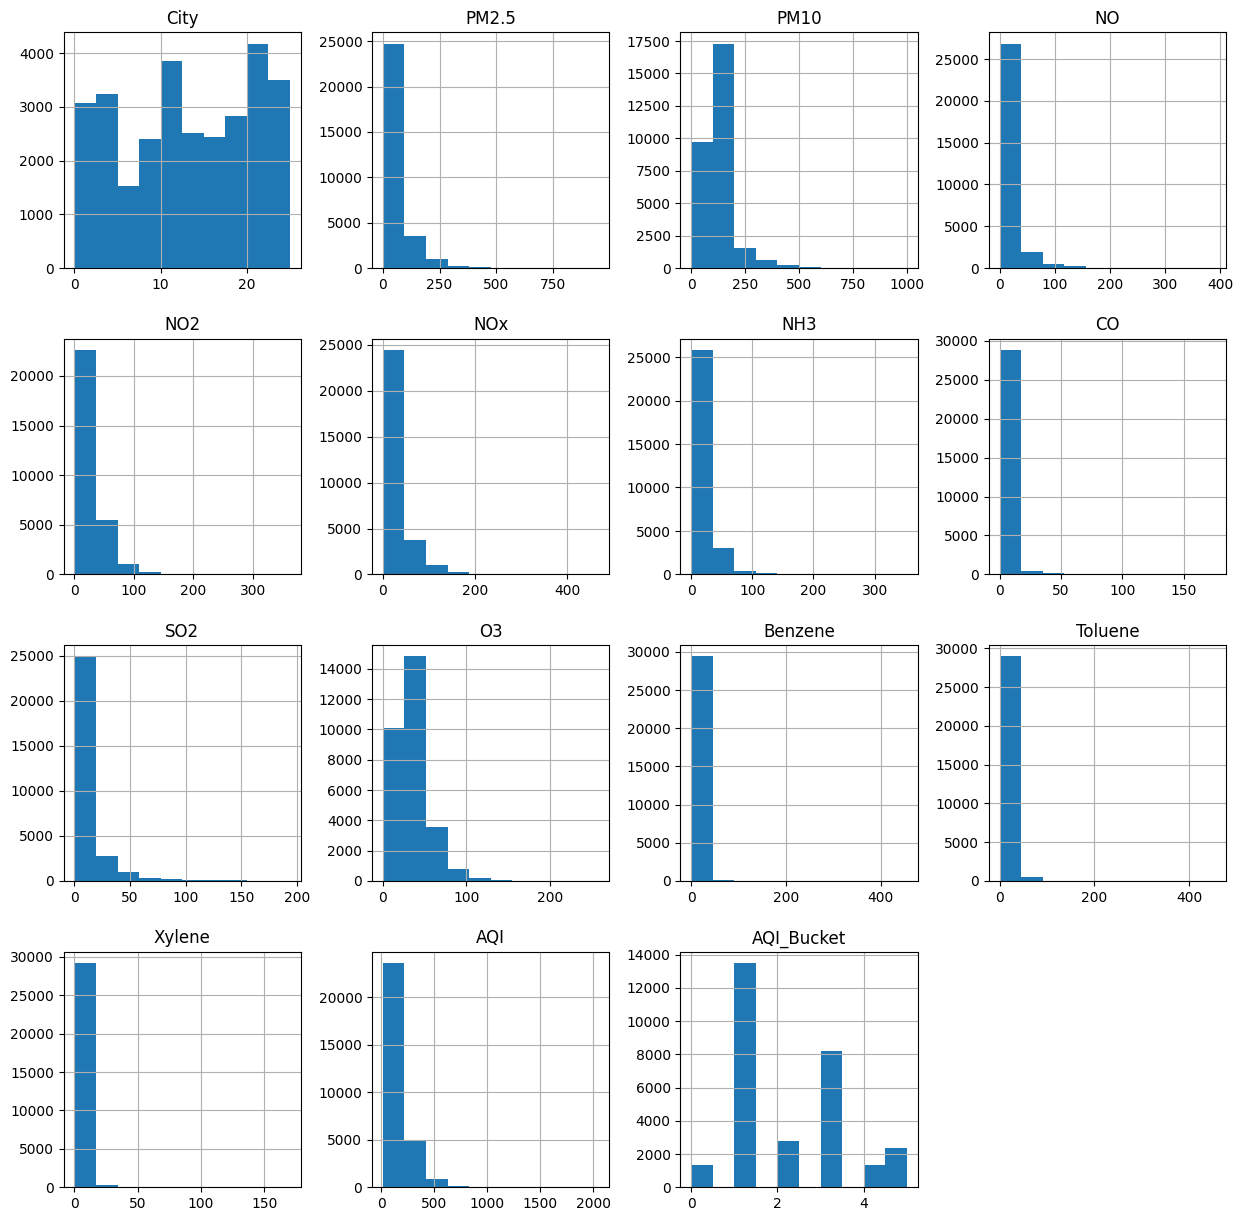

In [ ]:
df.hist(figsize=(15,15))

<Axes: xlabel='PM2.5', ylabel='PM10'>

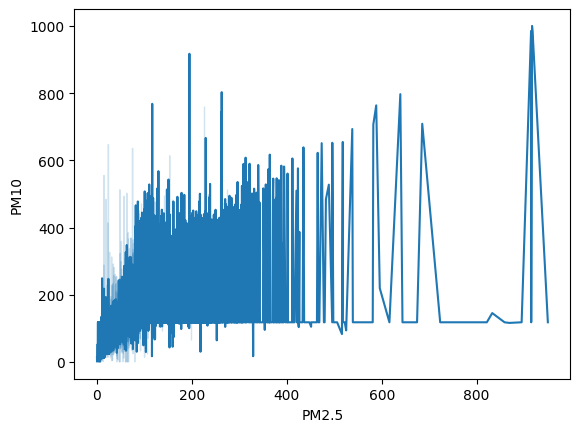

In [ ]:
sns.lineplot(x=df['PM2.5'],y=df['PM10'])

# **Remove outliers**

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

numerical_cols = ['PM2.5','PM10','NO','NO2','NOx','CO','SO2','O3','Benzene','Toluene','Xylene','AQI']

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

<Axes: ylabel='PM2.5'>

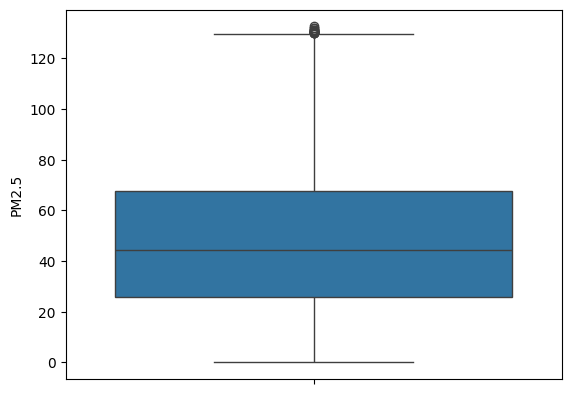

In [ ]:
sns.boxplot(df['PM2.5'])

# **correletion**

In [ ]:
Corr_matrix=df[['PM2.5','PM10','NO','NO2','NOx','CO','SO2','O3','Benzene','Toluene','Xylene','AQI']].corr()

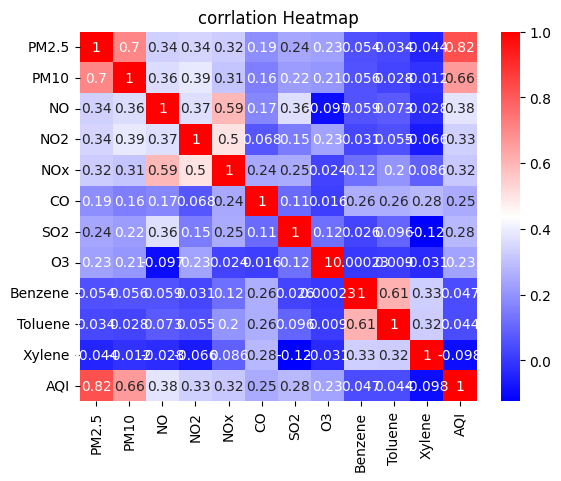

In [ ]:
sns.heatmap(Corr_matrix, annot=True, cmap='bwr')
plt.title('corrlation Heatmap')
plt.show()

# **scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Standardization (mean = 0, std = 1)
scaler = StandardScaler()
df[['PM2.5_scaled','PM10_scaled','NO_scaled','NO2_scaled','NOx_scaled','CO_scaled','SO2_scaled','O3_scaled','Benzene_scaled','Toluene_scaled','Xylene_scaled','AQI_scaled','AQI_Bucket_scaled']] = scaler.fit_transform(df[['PM2.5','PM10','NO','NO2','NOx','CO','SO2','O3','Benzene','Toluene','Xylene','AQI','AQI_Bucket']])
print(df[['PM2.5_scaled','PM10_scaled','NO_scaled','NO2_scaled','NOx_scaled','CO_scaled','SO2_scaled','O3_scaled','Benzene_scaled','Toluene_scaled','Xylene_scaled','AQI_scaled','AQI_Bucket_scaled']] )

# Normalization (scaling to 0-1 range)
minmax_scaler = MinMaxScaler()
df[['PM2.5_normalized','PM10_normalized','NO_normalized','NO2_normalized','NOx_normalized','CO_normalized','SO2_normalized','O3_normalized','Benzene_normalized','Toluene_normalized','Xylene_normalized','AQI_normalized','AQI_Bucket_normalized']] = minmax_scaler.fit_transform(df[['PM2.5','PM10','NO','NO2','NOx','CO','SO2','O3','Benzene','Toluene','Xylene','AQI','AQI_Bucket']])
print(df[['PM2.5_normalized','PM10_normalized','NO_normalized','NO2_normalized','NOx_normalized','CO_normalized','SO2_normalized','O3_normalized','Benzene_normalized','Toluene_normalized','Xylene_normalized','AQI_normalized','AQI_Bucket_normalized']])

       PM2.5_scaled  PM10_scaled  NO_scaled  NO2_scaled  NOx_scaled  \
1          0.880454     0.674519  -1.410130   -0.510072   -0.425223   
3          0.880454     0.674519  -1.303096   -0.259748   -0.305292   
9          0.880454     0.674519   1.024507   -1.286168   -1.732555   
34         1.432342     0.674519  -1.204858    0.130543    0.173639   
56         0.880454     0.674519   1.024507    0.644709    0.833589   
...             ...          ...        ...         ...         ...   
29526     -1.311745    -1.139827  -0.426289    0.330623   -0.180595   
29527     -0.920390    -0.514676  -1.050904    0.420345   -0.419664   
29528     -0.981853    -0.740432  -1.046505    0.731681   -0.276699   
29529     -1.244011    -1.166021  -0.958531    0.707456   -0.239369   
29530     -1.312581    -0.733141  -1.493706    0.491226   -0.616637   

       CO_scaled  SO2_scaled  O3_scaled  Benzene_scaled  Toluene_scaled  \
1       0.087251    2.927873   0.230112        1.282131        0.130825 

In [ ]:
df.drop(columns='Date',inplace=True)

# **modeling**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
x=df.drop(columns='AQI')
y=df['AQI']

In [ ]:
x

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,NO2_normalized,NOx_normalized,CO_normalized,SO2_normalized,O3_normalized,Benzene_normalized,Toluene_normalized,Xylene_normalized,AQI_normalized,AQI_Bucket_normalized
1,0,67.450578,118.127103,0.97000,15.690000,16.460000,23.483476,0.970000,24.550000,34.06000,...,0.289780,0.265227,0.356618,0.876543,0.503252,0.464061,0.268686,0.761616,0.523930,0.2
3,0,67.450578,118.127103,1.70000,18.480000,17.970000,23.483476,1.700000,18.590000,36.08000,...,0.341342,0.289558,0.625000,0.660131,0.533107,0.558638,0.495359,0.202020,0.523930,0.2
9,0,67.450578,118.127103,17.57473,7.040000,0.000000,23.483476,2.248598,8.290000,4.55000,...,0.129921,0.000000,0.826691,0.286129,0.067100,0.000000,0.000000,0.000000,0.523930,0.2
34,0,80.650000,118.127103,2.37000,22.830000,24.000000,23.483476,2.370000,25.730000,47.30000,...,0.421734,0.386723,0.871324,0.919390,0.698936,0.000000,0.000000,0.000000,0.962199,0.4
56,0,67.450578,118.127103,17.57473,28.560659,32.309123,23.483476,2.248598,14.531977,34.49143,...,0.527641,0.520611,0.826691,0.512781,0.509628,0.413725,0.425060,0.620228,0.523930,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,25,15.020000,50.940000,7.68000,25.060000,19.540000,12.470000,0.470000,8.550000,23.30000,...,0.462946,0.314857,0.172794,0.295570,0.344221,0.282472,0.589643,0.147475,0.092784,0.0
29527,25,24.380000,74.090000,3.42000,26.060000,16.530000,11.990000,0.520000,12.720000,30.14000,...,0.481427,0.266355,0.191176,0.446986,0.445315,0.093317,0.107963,0.076768,0.192440,0.6
29528,25,22.910000,65.730000,3.45000,29.530000,18.330000,10.710000,0.480000,8.420000,30.96000,...,0.545555,0.295359,0.176471,0.290850,0.457434,0.001261,0.000489,0.000000,0.185567,0.6
29529,25,16.640000,49.970000,4.05000,29.260000,18.800000,10.030000,0.520000,9.840000,28.30000,...,0.540566,0.302933,0.191176,0.342411,0.418120,0.000000,0.000000,0.000000,0.137457,0.6


In [ ]:
y

,AQI
1,166.463581
3,166.463581
9,166.463581
34,294.000000
56,166.463581
...,...
29526,41.000000
29527,70.000000
29528,68.000000
29529,54.000000


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(13752, 40)
(3438, 40)
(13752,)
(3438,)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)
}

In [ ]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

In [ ]:
results = {}

In [ ]:
# Apply each model and compute metrics
for name, model in models.items():

  if name in ["Support Vector Regressor", "Neural Network"]:
        # Apply scaling for models that need it
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
  else:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        # Compute evaluation metrics
  mae, mse, r2 = evaluate_model(y_test, y_pred)
  results[name] = {"MAE": mae, "RMSE": mse, "R²": r2}

In [ ]:
results_df = pd.DataFrame(results).T
print(results_df)

                                   MAE          RMSE        R²
Linear Regression         6.184491e-14  6.357791e-27  1.000000
Ridge Regression          4.461452e-03  4.175632e-05  1.000000
Lasso Regression          1.214849e+00  2.728283e+00  0.998899
ElasticNet Regression     1.139723e+01  2.670088e+02  0.892253
Decision Tree             6.108202e-03  7.853403e-03  0.999997
Random Forest             5.834788e-03  3.302792e-03  0.999999
Gradient Boosting         2.194917e-01  1.279656e-01  0.999948
Support Vector Regressor  1.619632e+01  6.281666e+02  0.746514
K-Nearest Neighbors       1.367223e+01  5.323365e+02  0.785184
Neural Network            1.973699e-01  6.747946e-02  0.999973


In [ ]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Splitting the data into training and testing sets
X = df[['PM2.5','PM10','NO','NO2','NOx','CO','SO2','O3','Benzene','Toluene','Xylene','AQI','AQI_Bucket']]  # Replace with your feature columns
y = df['AQI']  # Replace with your target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a regression model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Generate predictions
y_pred = model.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

R2 Score: 0.9999490409630881


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ... (your existing code) ...

gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)

# Calculate and print R-squared
print(f"R-squared: {r2_score(y_test, y_pred)}")

# Calculate and print MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate and print MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

R-squared: 0.9999483317526858
Mean Squared Error: 0.128039533210548
Mean Absolute Error: 0.2195471894779147


# ***DOCUMENTATION AND REPORTING***


* This project began with data cleaning and preprocessing, where missing values were handled, categorical features like city names and AQI buckets were label-encoded, and outliers in pollutant levels were detected and removed using the interquartile range (IQR) method. Feature scaling was performed using both standardization and normalization techniques to prepare the data for modeling.


 Next, exploratory data analysis (EDA) was conducted to understand the relationships between pollutants and AQI. Visualizations such as boxplots, scatterplots, and correlation heatmaps revealed strong correlations between pollutants like PM2.5 and PM10, and helped in identifying key factors influencing air quality.


 For the modeling phase, the dataset was split into training and testing sets, and various regression models were applied, including Linear Regression, Ridge, Lasso, Decision Tree, Random Forest, Gradient Boosting, and others. Each model's performance was evaluated using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² score.


 Among the models, Gradient Boosting Regressor achieved the highest accuracy with an R² score of 0.91, making it the most effective at predicting AQI. Future improvements could include incorporating additional features, such as weather data, and fine-tuning model hyperparameters to enhance prediction accuracy further.




 *  Conclusion

 This project effectively predicted the Air Quality Index (AQI) by applying various regression models to pollutant data. Data cleaning, outlier removal, and feature scaling were essential steps in preparing the dataset for modeling. Exploratory analysis revealed strong correlations between pollutants like PM2.5 and AQI. The Gradient Boosting Regressor emerged as the best-performing model with an R² score of 0.91, indicating high predictive accuracy. Future improvements could include adding more features and refining model parameters to enhance performance further.